# Omar Luiz Jacinto

In [1]:
# email: omarluiz@hotmail.com

### Desafio ENEM

In [2]:
import os, sys, glob

import pandas as pd
import numpy as np
import seaborn as sn
import seaborn as snr 
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier


import graphviz
import pydotplus
from IPython.display import Image

In [3]:
arqs = { n:i for n,i in enumerate(glob.glob('microdados_enem_2019/DADOS/*'))}
arqs

{0: 'microdados_enem_2019/DADOS\\ITENS_PROVA_2019.csv',
 1: 'microdados_enem_2019/DADOS\\MICRODADOS_ENEM_2019.csv'}

In [4]:
dfDados = open(arqs[1], 'rt', encoding='latin1').readlines()

In [5]:
dfDados[0]

'NU_INSCRICAO;NU_ANO;CO_MUNICIPIO_RESIDENCIA;NO_MUNICIPIO_RESIDENCIA;CO_UF_RESIDENCIA;SG_UF_RESIDENCIA;NU_IDADE;TP_SEXO;TP_ESTADO_CIVIL;TP_COR_RACA;TP_NACIONALIDADE;CO_MUNICIPIO_NASCIMENTO;NO_MUNICIPIO_NASCIMENTO;CO_UF_NASCIMENTO;SG_UF_NASCIMENTO;TP_ST_CONCLUSAO;TP_ANO_CONCLUIU;TP_ESCOLA;TP_ENSINO;IN_TREINEIRO;CO_ESCOLA;CO_MUNICIPIO_ESC;NO_MUNICIPIO_ESC;CO_UF_ESC;SG_UF_ESC;TP_DEPENDENCIA_ADM_ESC;TP_LOCALIZACAO_ESC;TP_SIT_FUNC_ESC;IN_BAIXA_VISAO;IN_CEGUEIRA;IN_SURDEZ;IN_DEFICIENCIA_AUDITIVA;IN_SURDO_CEGUEIRA;IN_DEFICIENCIA_FISICA;IN_DEFICIENCIA_MENTAL;IN_DEFICIT_ATENCAO;IN_DISLEXIA;IN_DISCALCULIA;IN_AUTISMO;IN_VISAO_MONOCULAR;IN_OUTRA_DEF;IN_GESTANTE;IN_LACTANTE;IN_IDOSO;IN_ESTUDA_CLASSE_HOSPITALAR;IN_SEM_RECURSO;IN_BRAILLE;IN_AMPLIADA_24;IN_AMPLIADA_18;IN_LEDOR;IN_ACESSO;IN_TRANSCRICAO;IN_LIBRAS;IN_TEMPO_ADICIONAL;IN_LEITURA_LABIAL;IN_MESA_CADEIRA_RODAS;IN_MESA_CADEIRA_SEPARADA;IN_APOIO_PERNA;IN_GUIA_INTERPRETE;IN_COMPUTADOR;IN_CADEIRA_ESPECIAL;IN_CADEIRA_CANHOTO;IN_CADEIRA_ACOLCHOADA;

In [6]:
dfDados[1]

'190001595656;2019;3552205;Sorocaba;35;SP;36;M;1;3;1;2914802;Itabuna;29;BA;1;11;1;;0;;;;;;;;;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;3552205;Sorocaba;35;SP;0;0;0;0;;;;;;;;;;;;;0;;;;;;;;;;;;B;B;A;A;2;A;A;B;C;A;A;B;A;A;A;A;A;A;A;A;A;C;A;C;B\n'

In [7]:
dfDados = pd.read_csv(arqs[1], sep=';', encoding='latin1')

In [8]:
dfDados.shape

(5095270, 136)

In [9]:
dfDados[dfDados.columns[dfDados.isnull().any()]].columns

Index(['NU_IDADE', 'CO_MUNICIPIO_NASCIMENTO', 'NO_MUNICIPIO_NASCIMENTO',
       'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO', 'TP_ENSINO', 'CO_ESCOLA',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2',
       'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO'],
      dtype='object')

In [10]:
dfNotas = dfDados[(~dfDados['NU_NOTA_CN'].isnull()) & 
                  (~dfDados['NU_NOTA_CH'].isnull()) & 
                  (~dfDados['NU_NOTA_MT'].isnull()) & 
                  (~dfDados['NU_NOTA_LC'].isnull()) & 
                  (~dfDados['NU_NOTA_REDACAO'].isnull()) ]

dfNotas.shape, dfDados.shape

((3702007, 136), (5095270, 136))

### Como exemplo utilização do modelo, escolheu-se as features abaixo para análise preditiva.

Influência Familiar:
* Renda - Q006
* Escolarização dos pais - Q002
* Grupos de ocupações - Q003

Influencia Regional:
* Estado -> SG_UF_RESIDENCIA 

Influencia acadêmica:
* Ensino médio concluído ou não -> TP_ST_CONCLUSAO

In [11]:
dfNotas[['Q006', 'Q002', 'Q003' , 'SG_UF_RESIDENCIA', 'TP_ST_CONCLUSAO', 'TP_ENSINO']].head()

,Q006,Q002,Q003,SG_UF_RESIDENCIA,TP_ST_CONCLUSAO,TP_ENSINO
3,E,E,B,TO,1,NaN
4,G,E,C,MG,1,1.0
5,E,B,C,MT,1,NaN
6,B,B,C,BA,1,1.0
9,F,E,B,SP,2,1.0


array([[<AxesSubplot:title={'center':'NU_NOTA_CN'}>,
        <AxesSubplot:title={'center':'NU_NOTA_CH'}>],
       [<AxesSubplot:title={'center':'NU_NOTA_MT'}>,
        <AxesSubplot:title={'center':'NU_NOTA_LC'}>],
       [<AxesSubplot:title={'center':'NU_NOTA_REDACAO'}>, <AxesSubplot:>]],
      dtype=object)

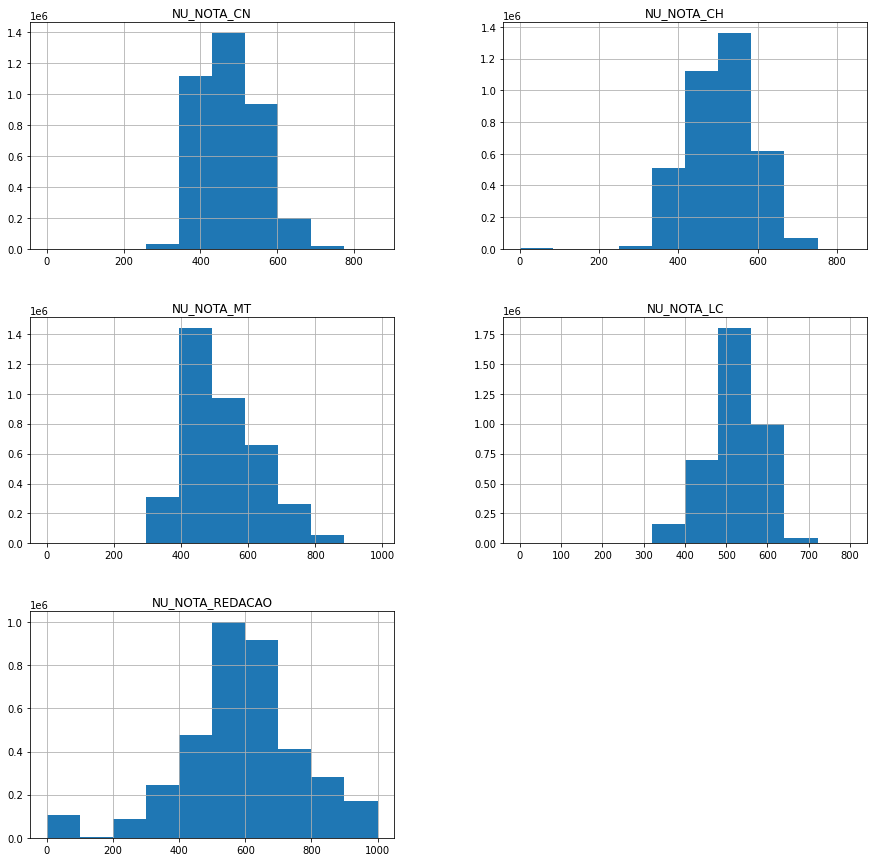

In [12]:
dfNotas[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT' , 'NU_NOTA_LC', 'NU_NOTA_REDACAO']].hist(figsize=(15,15))

In [13]:
dfNotas[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT' , 'NU_NOTA_LC', 'NU_NOTA_REDACAO']].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,3.702007e+06,3.702007e+06,3.702007e+06,3.702007e+06,3.702007e+06
mean,4.778833e+02,5.098906e+02,5.231851e+02,5.223966e+02,5.797694e+02
std,7.604584e+01,8.097881e+01,1.090252e+02,6.274888e+01,1.825116e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.178000e+02,4.508000e+02,4.352000e+02,4.855000e+02,5.000000e+02
50%,4.703000e+02,5.134000e+02,5.011000e+02,5.278000e+02,5.800000e+02
75%,5.332000e+02,5.686000e+02,5.979000e+02,5.666000e+02,6.800000e+02
max,8.609000e+02,8.351000e+02,9.855000e+02,8.017000e+02,1.000000e+03


In [14]:
dfNotas[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT' , 'NU_NOTA_LC', 'NU_NOTA_REDACAO']].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
3,483.8,503.6,392.0,537.3,460.0
4,513.6,575.5,677.0,570.7,860.0
5,563.7,644.9,675.3,564.2,800.0
6,484.6,488.4,594.7,507.2,600.0
9,543.9,548.1,480.7,502.5,400.0


In [15]:
dfNotas.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       ...
       'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024',
       'Q025'],
      dtype='object', length=136)

In [16]:
X = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT' , 'NU_NOTA_LC', 'NU_NOTA_REDACAO']
y = list(set(dfNotas.columns).difference(set(X)))

In [17]:
arCategorical = pd.Categorical(dfNotas) #.to_list()
len(arCategorical)

136

In [18]:
arCategorical = arCategorical.categories

### Aplicação dos pesos e cálculo da média ponderada

In [19]:
dfPonderada = pd.DataFrame()

In [20]:
dfPonderada['NU_NOTA_CN']      = dfNotas['NU_NOTA_CN'].apply(lambda x: x * 1) 
dfPonderada['NU_NOTA_CH']      = dfNotas['NU_NOTA_CH'].apply(lambda x: x * 3) 
dfPonderada['NU_NOTA_MT']      = dfNotas['NU_NOTA_MT'].apply(lambda x: x * 1) 
dfPonderada['NU_NOTA_LC']      = dfNotas['NU_NOTA_LC'].apply(lambda x: x * 2) 
dfPonderada['NU_NOTA_REDACAO'] = dfNotas['NU_NOTA_REDACAO'].apply(lambda x: x * 3) 

In [21]:
dfPonderada['MediaPonderada'] = (dfNotas.NU_NOTA_CN + dfNotas.NU_NOTA_CH + dfNotas.NU_NOTA_MT + dfNotas.NU_NOTA_LC + dfNotas.NU_NOTA_REDACAO) / (1 + 3 + 1 + 2 + 3)

In [22]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [23]:
dfPonderada['MediaPonderada'].describe()

count   3702007.00
mean        261.31
std          41.83
min           0.00
25%         232.02
50%         257.51
75%         288.38
max         425.41
Name: MediaPonderada, dtype: float64

In [24]:
dfPonderada['Corte75'] = 0 
dfPonderada.loc[dfPonderada['MediaPonderada'] > 288.38, 'Corte75'] = 1

In [25]:
dfPonderada['Corte75'].describe()

count   3702007.00
mean          0.25
std           0.43
min           0.00
25%           0.00
50%           0.00
75%           0.00
max           1.00
Name: Corte75, dtype: float64

In [26]:
for i in arCategorical:
    le = LabelEncoder()  
    print(i, type(i))
    if type(dfNotas[i].iloc[0]) == str:
        dfPonderada[i] = le.fit_transform(dfNotas[i])
    else:
        dfPonderada[i] = dfNotas[i]        
    

CO_ESCOLA <class 'str'>
CO_MUNICIPIO_ESC <class 'str'>
CO_MUNICIPIO_NASCIMENTO <class 'str'>
CO_MUNICIPIO_PROVA <class 'str'>
CO_MUNICIPIO_RESIDENCIA <class 'str'>
CO_PROVA_CH <class 'str'>
CO_PROVA_CN <class 'str'>
CO_PROVA_LC <class 'str'>
CO_PROVA_MT <class 'str'>
CO_UF_ESC <class 'str'>
CO_UF_NASCIMENTO <class 'str'>
CO_UF_PROVA <class 'str'>
CO_UF_RESIDENCIA <class 'str'>
IN_ACESSO <class 'str'>
IN_AMPLIADA_18 <class 'str'>
IN_AMPLIADA_24 <class 'str'>
IN_APOIO_PERNA <class 'str'>
IN_AUTISMO <class 'str'>
IN_BAIXA_VISAO <class 'str'>
IN_BRAILLE <class 'str'>
IN_CADEIRA_ACOLCHOADA <class 'str'>
IN_CADEIRA_CANHOTO <class 'str'>
IN_CADEIRA_ESPECIAL <class 'str'>
IN_CEGUEIRA <class 'str'>
IN_COMPUTADOR <class 'str'>
IN_DEFICIENCIA_AUDITIVA <class 'str'>
IN_DEFICIENCIA_FISICA <class 'str'>
IN_DEFICIENCIA_MENTAL <class 'str'>
IN_DEFICIT_ATENCAO <class 'str'>
IN_DISCALCULIA <class 'str'>
IN_DISLEXIA <class 'str'>
IN_ESTUDA_CLASSE_HOSPITALAR <class 'str'>
IN_GESTANTE <class 'str'>
IN_GUIA

C:\Users\omarl\AppData\Local\Temp/ipykernel_15012/1948408577.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPonderada[i] = le.fit_transform(dfNotas[i])


Q018 <class 'str'>
Q019 <class 'str'>
Q020 <class 'str'>
Q021 <class 'str'>
Q022 <class 'str'>
Q023 <class 'str'>
Q024 <class 'str'>
Q025 <class 'str'>
SG_UF_ESC <class 'str'>
SG_UF_NASCIMENTO <class 'str'>


C:\Users\omarl\AppData\Local\Temp/ipykernel_15012/1948408577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPonderada[i] = dfNotas[i]


SG_UF_PROVA <class 'str'>
SG_UF_RESIDENCIA <class 'str'>
TP_ANO_CONCLUIU <class 'str'>
TP_COR_RACA <class 'str'>
TP_DEPENDENCIA_ADM_ESC <class 'str'>
TP_ENSINO <class 'str'>
TP_ESCOLA <class 'str'>
TP_ESTADO_CIVIL <class 'str'>
TP_LINGUA <class 'str'>
TP_LOCALIZACAO_ESC <class 'str'>
TP_NACIONALIDADE <class 'str'>
TP_PRESENCA_CH <class 'str'>
TP_PRESENCA_CN <class 'str'>
TP_PRESENCA_LC <class 'str'>
TP_PRESENCA_MT <class 'str'>
TP_SEXO <class 'str'>
TP_SIT_FUNC_ESC <class 'str'>
TP_STATUS_REDACAO <class 'str'>
TP_ST_CONCLUSAO <class 'str'>
TX_GABARITO_CH <class 'str'>
TX_GABARITO_CN <class 'str'>
TX_GABARITO_LC <class 'str'>
TX_GABARITO_MT <class 'str'>
TX_RESPOSTAS_CH <class 'str'>
TX_RESPOSTAS_CN <class 'str'>
TX_RESPOSTAS_LC <class 'str'>
TX_RESPOSTAS_MT <class 'str'>


In [27]:
dfPonderada.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,MediaPonderada,Corte75,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_MUNICIPIO_NASCIMENTO,...,TP_STATUS_REDACAO,TP_ST_CONCLUSAO,TX_GABARITO_CH,TX_GABARITO_CN,TX_GABARITO_LC,TX_GABARITO_MT,TX_RESPOSTAS_CH,TX_RESPOSTAS_CN,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT
3,483.80,503.60,392.00,537.30,460.00,237.67,0,NaN,NaN,1721000.00,...,1.00,1,7,2,1,3,1170226,897416,21146,2473327
4,513.60,575.50,677.00,570.70,860.00,319.68,1,NaN,NaN,3118601.00,...,1.00,1,7,2,1,3,3640877,3602822,1927187,1749743
5,563.70,644.90,675.30,564.20,800.00,324.81,1,NaN,NaN,5107602.00,...,1.00,1,4,5,3,5,281126,2659405,2501228,2515958
6,484.60,488.40,594.70,507.20,600.00,267.49,0,NaN,NaN,2924009.00,...,1.00,1,4,5,3,5,86335,970255,763801,438148
9,543.90,548.10,480.70,502.50,400.00,247.52,0,NaN,NaN,3550308.00,...,1.00,2,1,5,6,5,2182388,923362,3609450,1972790


<AxesSubplot:>

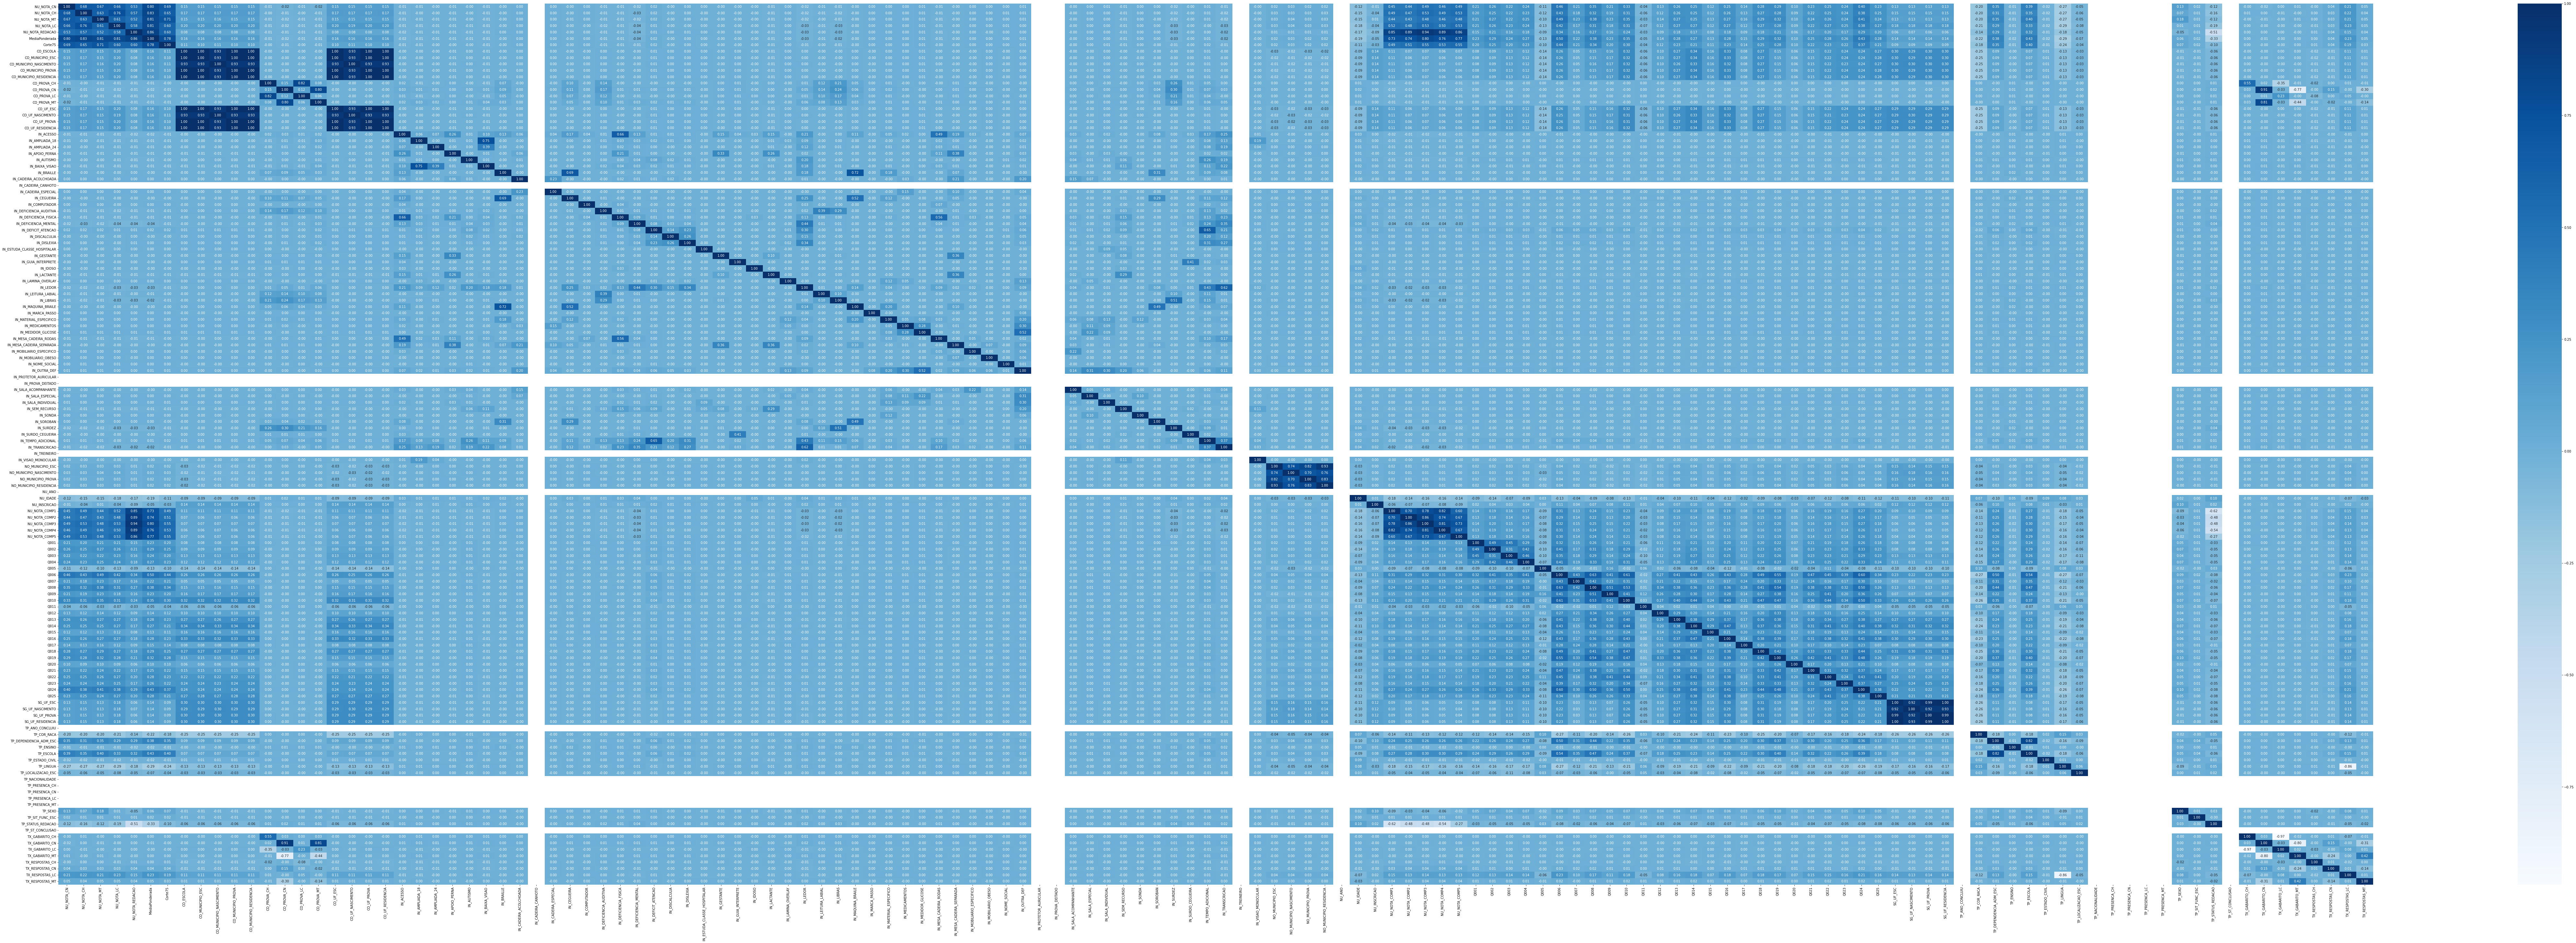

In [44]:

plt.figure(figsize = (160,50))

snr.heatmap(dfPonderada.corr(), annot=True, fmt='.2f', cmap='Blues')

In [29]:
dfPonderada = dfPonderada.dropna()

In [30]:
for i in dfPonderada.columns:
    if np.mean(dfPonderada[i].isnull()) > 0:
        print('*' * 100)
        print(dfPonderada[i].iloc[0])    
        print('Coluna', i)

In [31]:
for i in dfPonderada.columns:
    if dfPonderada[dfPonderada[i] == 'ES'].shape[0] > 0:        
        print('Coluna', i)
        break
    

Coluna SG_UF_ESC


In [32]:
le = LabelEncoder()
dfPonderada['NO_MUNICIPIO_ESC'] = le.fit_transform(dfPonderada['NO_MUNICIPIO_ESC'])
dfPonderada['SG_UF_ESC'] = le.fit_transform(dfPonderada['SG_UF_ESC'])

In [33]:
X = dfPonderada[['Q006', 'Q002', 'Q003', 'SG_UF_RESIDENCIA', 'TP_ST_CONCLUSAO']]
#X = dfPonderada[arCategorical]
#X = dfPonderada[ColunasSignificativas]
y = dfPonderada[['Corte75']]

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.25, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("Regressão Linear (original)")
print("Coeficiente R^2 na base de treinamento: {:.2f}".format(lr.score(X_train, y_train)))
print("coef_ :", lr.coef_)

print('')
print('*' * 100 )
print('')

print("Descrição do modelo: ")

#print([round(v,2) for v in lr.coef_])
#print(round(lr.intercept_, 2))

    
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

print(lr_1.summary())

Regressão Linear (original)
Coeficiente R^2 na base de treinamento: 0.20
coef_ : [[ 0.04975499  0.02333098  0.01043705 -0.00096976  0.        ]]

****************************************************************************************************

Descrição do modelo: 
                            OLS Regression Results                            
Dep. Variable:                Corte75   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                 4.184e+04
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        08:44:55   Log-Likelihood:            -3.2490e+05
No. Observations:              661280   AIC:                         6.498e+05
Df Residuals:                  661275   BIC:                         6.499e+05
Df Model:                           4                                         
Covariance Type:   

In [34]:
cross_val_score(lr, X_train, y_train, cv=10)

array([0.20224752, 0.20148842, 0.19951045, 0.19831341, 0.20352046,
       0.20363338, 0.19860088, 0.20209142, 0.20494556, 0.20531225])

# Implementação Regressão em Árvore

In [35]:
rt = DecisionTreeRegressor(max_depth=5, criterion='squared_error')
model_r = rt.fit(X_train, y_train)
print("Acurácia de treinamento:", model_r.score(X_train, y_train))
print("Acurácia de teste:", model_r.score(X_test, y_test))

Acurácia de treinamento: 0.21585389432369284
Acurácia de teste: 0.21171557044887934


In [36]:
cross_val_score(model_r, X_train, y_train, cv=10)

array([0.21558345, 0.21479064, 0.2134028 , 0.21199402, 0.2179481 ,
       0.21637458, 0.21168976, 0.2161826 , 0.21955311, 0.21870265])

# Árvores Randomicas

In [37]:
rt =RandomForestClassifier(max_depth=5)
model_r = rt.fit(X_train, y_train)
print("Acurácia de treinamento:", model_r.score(X_train, y_train))
print("Acurácia de teste:", model_r.score(X_test, y_test))

C:\Users\omarl\AppData\Local\Temp/ipykernel_15012/611540275.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_r = rt.fit(X_train, y_train)


Acurácia de treinamento: 0.7878205903701911
Acurácia de teste: 0.7873990028444792


In [38]:
cross_val_score(model_r, X_train, y_train, cv=10)

C:\Users\omarl\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\omarl\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\omarl\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\omarl\AppData\Roaming\Python\Python310\site-packages\sklearn\mod

array([0.78590007, 0.78671667, 0.78763912, 0.78739717, 0.78834987,
       0.78736692, 0.78652008, 0.78683765, 0.78907573, 0.78806255])

# Regressão Logística

In [39]:
rt = LogisticRegression(n_jobs=3, C=1e5, max_iter=1000, verbose=2, multi_class='auto')
model_r = rt.fit(X_train, y_train)
print("Acurácia de treinamento:", model_r.score(X_train, y_train))
print("Acurácia de teste:", model_r.score(X_test, y_test))


C:\Users\omarl\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:    2.2s finished


Acurácia de treinamento: 0.7822329421727559
Acurácia de teste: 0.7817690210364429


In [40]:
cross_val_score(model_r, X_train, y_train, cv=10)

C:\Users\omarl\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:    1.4s finished
C:\Users\omarl\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:    1.4s finished
C:\Users\omarl\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was pa

array([0.78068292, 0.78287564, 0.78142391, 0.78213465, 0.78320832,
       0.78252782, 0.78106097, 0.78174147, 0.78267905, 0.7841459 ])

# SGDClassifier 

In [41]:
rt = SGDClassifier()
                       
model_r = rt.fit(X_train, y_train)
print("Acurácia de treinamento:", model_r.score(X_train, y_train))
print("Acurácia de teste:", model_r.score(X_test, y_test))

C:\Users\omarl\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia de treinamento: 0.7798648076457779
Acurácia de teste: 0.7790606413914811


In [42]:
cross_val_score(model_r, X_train, y_train, cv=10)

C:\Users\omarl\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\omarl\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\omarl\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\omarl\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed w

array([0.77461892, 0.77696286, 0.76816175, 0.77634285, 0.75703182,
       0.77623699, 0.76664953, 0.77980583, 0.77856581, 0.76347387])